# Problem Set 3, due October 2 at 11:59pm.

### Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python! Part 1 will be relatively easy; Part 2 will take more time.

In [3]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import math
import time

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://www.kellogg.northwestern.edu/faculty/weber/emp/_session_3/boston.htm).  Please read about the dataset carefully before continuing.  Use the following commands to load the dataset:


In [4]:
from sklearn.datasets import load_boston
bdata = load_boston()

---

## Part 1: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.
Before beginning the "real" work, refamiliarize yourself with the dataset.

### 1.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation). Do not use a built-in function (other than sqrt) to compute RMSE.



In [5]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print(compute_rmse((2,2,3),(0,2,6)))
2.08
"""
def compute_rmse(predictions, yvalues):
    # your code here
    rmse = "NaN"
    predictions = np.asarray(predictions)
    yvalues = np.asarray(yvalues)
    if len(predictions)!=len(yvalues):
        return rmse
    elif len(predictions)==0:
        return rmse
    else:
        rmse=math.sqrt(1/float(len(predictions))*np.sum(np.subtract(predictions,yvalues)**2))
    return rmse


print(compute_rmse((2,2,3),(0,2,6)))

2.0816659994661326


### 1.2 Divide your data into training and testing datasets

Randomly select 80% of the data and put this in a training dataset (call this "bdata_train"), and place the remaining 20% in a testing dataset (call this "bdata_test")


In [6]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)


# enter your code here
def splitData(inputData,inputTarget,trainingPercentage = 0.8):
    if len(inputData)!=len(inputTarget):
        return "data sets not equal in size",-1
    else:
        countofData = len(inputData)
        #create array of index values that we will use to shuffle our data
        indexOrder = np.random.permutation(countofData)
        
        #shuffle the dataframes according to indexOrder
        inputData= inputData.iloc[indexOrder]
        inputTarget= inputTarget.iloc[indexOrder]
        
        #now we just slice the data accordingly
        #note I'm separating training and testing dataframes
        trainingData = inputData[0:int(trainingPercentage*len(inputData))]
        testingData = inputData[len(trainingData):]
        trainingTarget = inputTarget[0:int(trainingPercentage*len(inputTarget))]
        testingTarget = inputTarget[len(trainingTarget):]
        return trainingData,testingData,trainingTarget,testingTarget

bostonData = pd.DataFrame(data = bdata.data,columns=bdata.feature_names)
bostonTarget = pd.DataFrame(bdata.target,columns=['MedianValue'])

trainingData,testingData,trainingTarget,testingTarget = splitData(bostonData,bostonTarget,0.8)

print(len(trainingData))
print(len(testingData))
#now convert indices to sets and leverage isdisjoint to check if they are in fact disjoint, if they are we are good to go
#they are
#print(set(trainingData.index).isdisjoint(testingData.index))

404
102


### 1.3 Use a very bad baseline for prediction, and compute RMSE

Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Specifically, do the following:
1. Compute the RMSE of the training set.
2. Now compute the RMSE on the test data set (but use the model you trained on the training set!).
3. How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?
4. Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. Color the training instances in blue and the test instances in red. Make sure to label your axes appropriately, and add a legend to your figure to make clear which dots are which.
5. Add code to your function to measure the running time of your algorithm. How long does it take to compute the predicted values for the test data?

Time in seconds for prediction data : 0.0013921319352919908
RMSE training vs training prediction: 9.207281207825494
Time in seconds for RMSE calculation: 0.00022346889980055752
Time in seconds for prediction data : 0.00030977734753146174
RMSE test vs training prediction    : 9.11139618372449
Time in seconds for RMSE calculation: 0.0006512788812559041


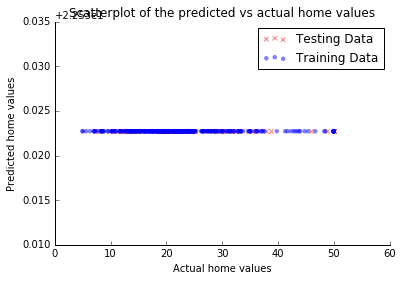

In [7]:
# enter your code here

start= time.clock()
predictionFromTraining = (np.full((1, len(trainingTarget)), trainingTarget['MedianValue'].mean()))[0]
end= time.clock()
timediff= (end-start)
print('Time in seconds for prediction data :',timediff)

start= time.clock()
RMSE_training_vs_trainingprediction = compute_rmse(predictionFromTraining,np.asarray(trainingTarget['MedianValue']))
end= time.clock()
timediff= (end-start)
print('RMSE training vs training prediction:',RMSE_training_vs_trainingprediction)
print('Time in seconds for RMSE calculation:',timediff)

start= time.clock()
predictionFromTraining_testsize = (np.full((1, len(testingTarget)), trainingTarget['MedianValue'].mean()))[0]
end= time.clock()
timediff= (end-start)
print('Time in seconds for prediction data :',timediff)

RMSE_testing_vs_trainingprediction = compute_rmse(predictionFromTraining_testsize,np.asarray(testingTarget['MedianValue']))
end= time.clock()
timediff= (end-start)
print('RMSE test vs training prediction    :',RMSE_testing_vs_trainingprediction)
print('Time in seconds for RMSE calculation:',timediff)

%matplotlib inline

fig = plt.figure()
ax = plt.gca()

plt.title('Scatterplot of the predicted vs actual home values')
plt.ylabel('Predicted home values')
plt.xlabel('Actual home values')

plt.scatter(x=np.asarray(testingTarget['MedianValue']),y= predictionFromTraining_testsize,marker='x',color='red', alpha=0.5, edgecolors='none',
           label='Testing Data')
plt.scatter(x=np.asarray(trainingTarget['MedianValue']),y= predictionFromTraining,marker='o',color='blue', alpha=0.5, edgecolors='none',
           label='Training Data')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(axis='x',which='both',top='off') # labels along the bottom edge are off
plt.tick_params(axis='y',which='both',right='off') # labels along the bottom edge are off

plt.show()

*Enter your observations here*
1. Compute the RMSE of the training set.**I get 9.2072 as RMSE for the training data**

2. Now compute the RMSE on the test data set (but use the model you trained on the training set!). **I get 9.11396**

3. How does RMSE compare for training vs. testing datasets? Is this what you expected, and why? **They are actually quite close, but this really does not mean much as the prediction method is just the mean of the training set, so what is the testing and training data are very similar. It doesn't say much in my view. **

4. Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. Color the training instances in blue and the test instances in red. Make sure to label your axes appropriately, and add a legend to your figure to make clear which dots are which.**Since we are only using the average(mean) of the training data set, the predictions will always be the same regardless of X_i. This is why we see the flat line on the y-axis. On the x-axis, we show the actual value**

5. Add code to your function to measure the running time of your algorithm. How long does it take to compute the predicted values for the test data? **It happens really quick, given it is just the average of the training data and I already calculated this**


---

## Part 2: Nearest Neighbors


### 2.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average Value" baseline that you computed above.  Soon you will implement the Nearest Neighbor algorithm, but first you need to create a distance metric to measure the distance (and similarity) between two instances.  Write a generic function to compute the L-Norm distance (called the [*p*-norm][1] distance on Wikipedia). Verify that your function works by computing the Euclidean distance between the points (3,4) and (6,8).
[1]: https://en.wikipedia.org/wiki/Norm_(mathematics)#p-norm

In [8]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print(distance((3,4),(6,8),2))
5

"""
def distance(x1, x2, L=2):
    #your code here
    dist = "NaN"
    x1 = np.asarray(x1)
    x2 = np.asarray(x2)
    
    if len(x1)!=len(x2):
        return dist
    elif len(x1)==0:
        return dist
    else:
        
        dist = math.pow(np.sum(abs(np.subtract(x1,x2))**L),1.0/L)
    
    return dist

print(distance((3,4),(6,8),2))

5.0


### 2.2 Basic Nearest Neighbor algorithm

Your next task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as you know, with Nearest Neighbors there is no real training, you just need to keep your training data in memory.  Write a function that predicts the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, you can simply compare your test instance to every instance in the training set, and return the MEDV value of the closest training instance.  Have your function take L as an input, where L is passed to the distance function.

Make sure to do the following
1. Fill in the function specification below
2. Use your algorithm to predict the median home value of every instance in the test set. Report the RMSE ("test RMSE")
3. Use your algorithm to predict the median home value of every instance in the training set and report the training RMSE.
4. Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. Color the training instances in blue and the test instances in red. 
5. Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.
6. How does the performance (test RMSE and total runtime) of your nearest neighbors algorithm compare to the baseline in part 1.4?

Time taken: 2.1394991874694824 seconds
Time taken: 0.56742262840271 seconds


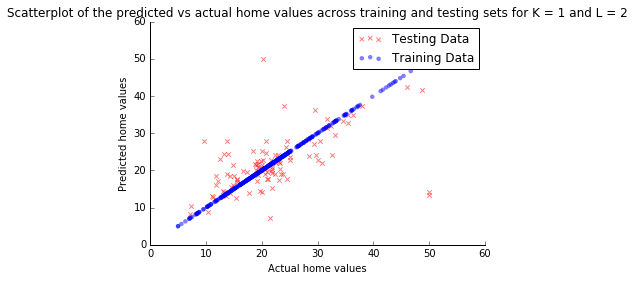

In [9]:
"""
# write your function specification here!
#I implemented the K-nearest neighbour algorithm as my method doesn't require a lot of extra overhead to get K=2,....N
#note this is not a classification algorithm, it is similar to a regression algorithm
#inputs
# inputData - a multidimensional numpy array containing the training data
# inputTarget  -a singular numpy array contining the target data, in our case house values
# desiredCoordinate - this is the multidimensional numpy array (mathcing shape of inputData) that we would like to predict
# L this is the value of our L-norm distance function
# k is the maximum k that we want to calculate, all k's from 1 to k will be calculated
# the function returns an array of thedifferent predictions, rows containing the predictions for each desired coordinate and columns
# containing k = 1 ... k
"""
##
##I just implemented k_nearest neighbors from the start, very little additional overhead to get K = 2,...n, since yyou have to calculate
##distance to all points in any case and then sort them
##
##
import time
def nneighbor(inputData,inputTarget,desiredCoordinate, L=2,k=1,verbose=1):
    start_time = time.time()
    #this function will fit knn and do predictions
    #inputData is the X data we fit to
    #inputTarget is the y data we regress to
    #desiredCoordinate is the data that we want to obtain y for using the fitted model
    
    #your code here
    #inputData can be multi dimensional to be given as np.ndarray
    #inputTarget is one dimensional np.array
    #desiredCoordinate is shame shape as inputData
    #we can make this a lot faster by just making our norm function capable of handling multidimensional arrays
    
    #calculate the distance of all points in inputData to desiredCoordinate
    #as mentioned keep everything in memory
    numInputs = len(inputData)
    #create matrix with number of rows equal to len of input Data and three columns, one for distance, second for median value, third
    # is a spare
    distanceArray = np.zeros((numInputs,2), dtype=np.float)
    #matrix where qwe can store the RMSE for each value of k
    kArray = np.zeros((len(desiredCoordinate),k), dtype=np.float)
    

    
    vdistance = np.vectorize(distance)
    vcompute_rmse = np.vectorize(compute_rmse)
       
    #first we loop over size of the desiredCoordinate   
    for j in range(0,len(desiredCoordinate)):
        #create matrix with number of rows equal to len of input Data and two columns, one for distance, second for median value
        distanceArray = np.zeros((numInputs,2), dtype=np.float)
        for i in range(0,len(inputData)):
            distanceArray[i] = distance(desiredCoordinate[j],inputData[i],L=L),inputTarget[i]
        #now we sort this so we can easily calculate k nearest
        distanceArray= distanceArray[distanceArray[:, 0].argsort(kind='mergesort')]
        #now we simply calculate average of k-nearest neighbors
        for kn in range(0,k):
            kArray[j,kn] = (sum(distanceArray[:,1][0:kn+1])/(1.*(1+kn)))
    if verbose==1:
        print("Time taken: {} seconds".format(time.time() - start_time))
    return kArray

k_n_n = 1
L_power = 2

predictions_for_Training = nneighbor(trainingData[["CRIM",'RM']].values,trainingTarget["MedianValue"].values,trainingData[["CRIM",'RM']].values,L=L_power,k=k_n_n)
trainingRMSE = compute_rmse(predictions_for_Training[:,k_n_n-1],trainingTarget["MedianValue"].values)
predictions_for_Testing = nneighbor(trainingData[["CRIM",'RM']].values,trainingTarget["MedianValue"].values,testingData[["CRIM",'RM']].values,L=L_power,k=k_n_n)
testingRMSE = compute_rmse(predictions_for_Testing[:,k_n_n-1],testingTarget["MedianValue"].values)
#your additional code here

fig = plt.figure()
ax = plt.gca()

plt.title('Scatterplot of the predicted vs actual home values across training and testing sets for K = 1 and L = 2')
plt.ylabel('Predicted home values')
plt.xlabel('Actual home values')

plt.scatter(x=testingTarget["MedianValue"].values,y= predictions_for_Testing[:,k_n_n-1],marker='x',color='red', alpha=0.5, edgecolors='none',
           label='Testing Data')
plt.scatter(x=trainingTarget["MedianValue"].values,y= predictions_for_Training[:,k_n_n-1],marker='o',color='blue', alpha=0.5, edgecolors='none',
           label='Training Data')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(axis='x',which='both',top='off') # labels along the bottom edge are off
plt.tick_params(axis='y',which='both',right='off') # labels along the bottom edge are off

plt.show()

In [10]:
print('RMSE median home values for training set, fit on training set, k = ' +str(k_n_n) + ' L='+str(L_power) +' :' +str(trainingRMSE))
print('RMSE median home values for testing  set, fit on training set, k = ' +str(k_n_n) + ' L='+str(L_power) +' :' +str(testingRMSE))
# print(predictions_for_Testing[:,0])
# print(testingTarget["MedianValue"].values)

RMSE median home values for training set, fit on training set, k = 1 L=2 :0.0
RMSE median home values for testing  set, fit on training set, k = 1 L=2 :7.7061727231626245


*Enter your observations here*

As expected the RMSE when predicting the training set and using k = 1 is zero. Given that the prediction would just equal the real value for that observation.

The RMSE for the testing set is 7.706, which is $7706. It took the algorithm 0.52 seconds to compute this. I think it can be done faster with some refactoring, perhaps some vectorization. The time taken is much slower than the baseline in 1.4, some order of magnitude slower. RMSE calc was 0.001 at its slowest and here we have 0.5 to 2 seconds, so 1000x slower.

The chart clearly shows the blue dots (forming a line) as expected at 45 degrees, as the predicted value matches the actual value. The red dots clearly show the difference between predict and actual, with the root mean squared error being $7706.




### 2.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Write a generic normalization function that takes as input an array of values for a given feature, and returns the normalized array (subtract the mean and divide by the standard deviation).

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations. What do you observe?

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

Time taken: 2.170551061630249 seconds
Time taken: 0.5423674583435059 seconds
normalized RMSE median home values for training set, fit on training set, k = 1 L=2 :0.0
normalized RMSE median home values for testing  set, fit on training set, k = 1 L=2 :7.861322545021464
my function RMSE median home values for training set, fit on training set, k = 1 L=2 :0.0
my function RMSE median home values for testing  set, fit on training set, k = 1 L=2 :7.861322545021464
Scikit RMSE median home values for training set, fit on training set, k = 1 L=2 :0.0
Scikit RMSE median home values for training set, fit on training set, k = 1 L=2 :7.861322545021464


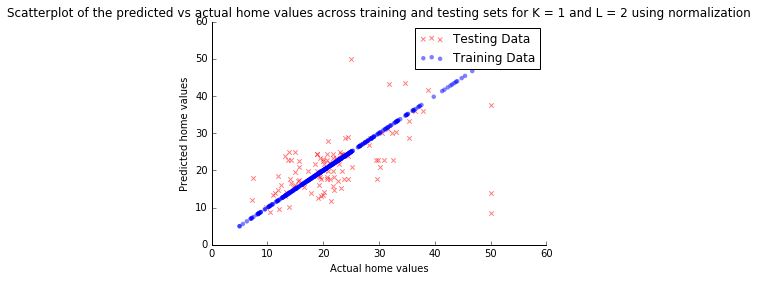

In [11]:
"""
# write your function specification here!
#function to normalize input data
#inputs
# raw_data is a multidimensional numpy array that will be normalized
# **optional is an optional dictionary parameter where you can pass {'norm_data':other multidim np array} where other multidim np array
# is potentially another set you want to use to get stdev and mean for normalizing your data
# output is just handing back a normalized multideimentional array
"""
def normalize(raw_data,**optional):
    #your code here
    
    num_cols = raw_data.shape[1]
    num_rows = raw_data.shape[0]
    for i in range(0,num_cols):
        if 'norm_data' in optional:
            num_rows = optional['norm_data'].shape[0]
            colMean = sum(optional['norm_data'][:,i]/(1.*num_rows))
            colStdDev = math.sqrt((1./num_rows)*sum((optional['norm_data'][:,i]-colMean)**2))
        else:
            colMean = sum(raw_data[:,i]/(1.*num_rows))
            colStdDev = math.sqrt((1./num_rows)*sum((raw_data[:,i]-colMean)**2))
        raw_data[:,i]=(raw_data[:,i]-colMean)/colStdDev
    
    return raw_data
normalize(trainingData[["CRIM",'RM']].values)

k_n_n=1
L_power=2

predictions_for_Training = nneighbor(normalize(trainingData[["CRIM",'RM']].values),trainingTarget["MedianValue"].values,
                                     normalize(trainingData[["CRIM",'RM']].values),L=L_power,k=k_n_n)
trainingRMSE = compute_rmse(predictions_for_Training[:,k_n_n-1],trainingTarget["MedianValue"].values)

predictions_for_Testing = nneighbor(normalize(trainingData[["CRIM",'RM']].values),trainingTarget["MedianValue"].values,
                                    normalize(testingData[["CRIM",'RM']].values),L=L_power,k=k_n_n)
testingRMSE = compute_rmse(predictions_for_Testing[:,k_n_n-1],testingTarget["MedianValue"].values)
#your additional code here
print('normalized RMSE median home values for training set, fit on training set, k = ' +str(k_n_n) + ' L='+str(L_power) +' :' +str(trainingRMSE))
print('normalized RMSE median home values for testing  set, fit on training set, k = ' +str(k_n_n) + ' L='+str(L_power) +' :' +str(testingRMSE))

#use Scikit to test my implementation.

print('my function RMSE median home values for training set, fit on training set, k = ' +str(k_n_n) + ' L='+str(L_power) +' :' +str(trainingRMSE))
print('my function RMSE median home values for testing  set, fit on training set, k = ' +str(k_n_n) + ' L='+str(L_power) +' :' +str(testingRMSE))


from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors=k_n_n, weights='uniform',p=L_power)
y_ = knn.fit(normalize(trainingData[["CRIM",'RM']].values), trainingTarget["MedianValue"].values)
trainingRMSE_knn = compute_rmse(y_.predict(normalize(trainingData[["CRIM",'RM']].values)),trainingTarget["MedianValue"].values)
print('Scikit RMSE median home values for training set, fit on training set, k = ' +str(k_n_n) + ' L='+str(L_power) +' :' +str(trainingRMSE_knn))
testingRMSE_knn = compute_rmse(y_.predict(normalize(testingData[["CRIM",'RM']].values)),testingTarget["MedianValue"].values)
print('Scikit RMSE median home values for training set, fit on training set, k = ' +str(k_n_n) + ' L='+str(L_power) +' :' +str(testingRMSE_knn))

fig = plt.figure()
ax = plt.gca()

plt.title('Scatterplot of the predicted vs actual home values across training and testing sets for K = 1 and L = 2 using normalization')
plt.ylabel('Predicted home values')
plt.xlabel('Actual home values')

plt.scatter(x=testingTarget["MedianValue"].values,y= predictions_for_Testing[:,k_n_n-1],marker='x',color='red', alpha=0.5, edgecolors='none',
           label='Testing Data')
plt.scatter(x=trainingTarget["MedianValue"].values,y= predictions_for_Training[:,k_n_n-1],marker='o',color='blue', alpha=0.5, edgecolors='none',
           label='Training Data')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(axis='x',which='both',top='off') # labels along the bottom edge are off
plt.tick_params(axis='y',which='both',right='off') # labels along the bottom edge are off

plt.show()

In [12]:
#some more testing compared to scikit leanr
k_n_n=5
L_power=5

print('now change k to ' +str(k_n_n)+' and L to '+str(L_power))
#seem the same
#now test for L (power) = 6 and k = 5
predictions_for_Testing = nneighbor(normalize(trainingData[["CRIM",'RM']].values),trainingTarget["MedianValue"].values,
                                    normalize(testingData[["CRIM",'RM']].values),L=L_power,k=k_n_n)
testingRMSE = compute_rmse(predictions_for_Testing[:,k_n_n-1],testingTarget["MedianValue"].values)
print('my function RMSE median home values for testing  set, fit on training set, k = ' +str(k_n_n) + ' L='+str(L_power) +' :' +str(testingRMSE))

knn = neighbors.KNeighborsRegressor(n_neighbors=k_n_n, weights='uniform',p=L_power)
y_ = knn.fit(normalize(trainingData[["CRIM",'RM']].values), trainingTarget["MedianValue"].values)

testingRMSE_knn = compute_rmse(y_.predict(normalize(testingData[["CRIM",'RM']].values)),testingTarget["MedianValue"].values)
print('Scikit RMSE median home values for testing  set, fit on training set, k = ' +str(k_n_n) + ' L='+str(L_power) +' :' +str(testingRMSE_knn))

now change k to 5 and L to 5
Time taken: 0.6764814853668213 seconds
my function RMSE median home values for testing  set, fit on training set, k = 5 L=5 :6.876157442676148
Scikit RMSE median home values for testing  set, fit on training set, k = 5 L=5 :6.876157442676148


*enter your observations here*

The speed of the nneighbors algorithm with normalization and without is more or less the same. This is because the normalization function does not add a lot of overhead.

The RMSE changed from USD7706.00 for non-normalized data to  USD7861.00 when using normalization with k=1 and L=2 for the testing set.

Out of interest I tested my algorithm against sci-kit learn for k = 5 and l = 5 and both return the same RMSEs, so the algorithm seems to work.

### 2.4 Optimization

A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!

What combination of features and distance function provide the lowest RMSE?  Do your decisions affect the running time of the algorithm?

*NOTE:* For this and all subsequent questions, you should use normalized features

### BEFORE YOU RUN THE NEXT CELL JUST NOTE IT TAKES 20 MINUTES USING CURRENT SETUP

In [13]:

# enter your code here

#the various values of L we want to test
l_set = [2,3,4]
#the various values of K we want to test #assignment only wants us to test k=1 but it works if you do K_test = [1,2,3,4]
K_test = [1]
#the features we can choose from
totalFeatures = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

#generate feature list all combinations of 2 and 4 features
#this will be used on our optimizer
import itertools
featuresToTest = []
for i in [2,4]:
    test = itertools.combinations(totalFeatures,i)
    for i in test:
        featuresToTest.append(list(i))

def Optimizer(trainingData,trainingTarget,testingTarget,features, L=[1],k=[1],debug=0):
    Opt_start_time = time.time()
    featurelen = len(features)
    bestmodel = ''
    bestRMSE = -1.0
    featuretoTest = ''
    counterAdd = 0
    #since there is very little overhead in time (but just in space for each K we want to get, let's just get them all)
    maksK = max(K_test)
    numberofModelsToTest=len(L)*len(features)*len(k)
    print('Total models we will test',numberofModelsToTest)
    
    for L_power in L:
        for j in features:
            start_time = time.time()
            predictions_for_Testing = nneighbor(normalize(trainingData[j].values),trainingTarget["MedianValue"].values,
                                            normalize(testingData[j].values),L=L_power,k=maksK,verbose=0)
            train_time = time.time()-start_time
            for k_n_n in range(1,maksK+1):
                testingRMSE = compute_rmse(predictions_for_Testing[:,k_n_n-1],testingTarget["MedianValue"].values)
                model = 'k = ' +str(k_n_n) + ':: L='+str(L_power) +':: features='+str(j) +':: train+pred time='+format(train_time,"0.5")+':: RMSE=' +format(testingRMSE,"0.5")
                if bestRMSE ==-1:
                    bestRMSE = testingRMSE
                    bestmodel = model
                    print('First best model::'+str(bestmodel))
                else:
                    if testingRMSE < bestRMSE:
                        bestmodel = model
                        bestRMSE = testingRMSE
                        print('New best model::'+str(bestmodel))
                if debug==1:
                    print('k = ' +str(k_n_n) + ':: L='+str(L_power) +':: features='+str(j) +':: train+pred time='+format(train_time,"0.5")
                          +':: RMSE=' +format(testingRMSE,"0.5"))

    print("Optimizer Time taken: {} seconds".format(time.time() - Opt_start_time))
    print('Best model is \n')
    print(bestmodel)
    print('Bestmodel RMSE :'+str(bestRMSE))

Optimizer(trainingData,trainingTarget,testingTarget,featuresToTest, L=l_set,k=K_test,debug=0)

Total models we will test 2379
First best model::k = 1:: L=2:: features=['CRIM', 'ZN']:: train+pred time=0.54938:: RMSE=11.552
New best model::k = 1:: L=2:: features=['CRIM', 'INDUS']:: train+pred time=0.55641:: RMSE=9.6625
New best model::k = 1:: L=2:: features=['CRIM', 'RM']:: train+pred time=0.53038:: RMSE=7.8613
New best model::k = 1:: L=2:: features=['CRIM', 'LSTAT']:: train+pred time=0.61444:: RMSE=7.4972
New best model::k = 1:: L=2:: features=['ZN', 'NOX']:: train+pred time=0.53638:: RMSE=7.1232
New best model::k = 1:: L=2:: features=['ZN', 'LSTAT']:: train+pred time=0.54839:: RMSE=6.1564


KeyboardInterrupt: 

*enter your observations here*

I wrote a function to optimize across all combinations of 2 features and 4 features, usign values of K = 1 and L being 2,3 or 4. The model with the lowest RMSE was k = 1:: L=4:: features=['CHAS', 'NOX', 'PTRATIO', 'LSTAT'], and the RMSE was 5.23803. It took about 20 minutes to complete.


# OUTPUT FROM OPTIMIZER

Total models we will test 2379

First best model::k = 1:: L=2:: features=['CRIM', 'ZN']:: train+pred time=0.97869:: RMSE=11.552

New best model::k = 1:: L=2:: features=['CRIM', 'INDUS']:: train+pred time=0.66648:: RMSE=9.6625

New best model::k = 1:: L=2:: features=['CRIM', 'RM']:: train+pred time=0.51338:: RMSE=7.8613

New best model::k = 1:: L=2:: features=['CRIM', 'LSTAT']:: train+pred time=0.60243:: RMSE=7.4972

New best model::k = 1:: L=2:: features=['ZN', 'NOX']:: train+pred time=0.55039:: RMSE=7.1232

New best model::k = 1:: L=2:: features=['ZN', 'LSTAT']:: train+pred time=0.50736:: RMSE=6.1564

New best model::k = 1:: L=2:: features=['PTRATIO', 'LSTAT']:: train+pred time=0.50636:: RMSE=5.9416

New best model::k = 1:: L=2:: features=['CRIM', 'ZN', 'AGE', 'LSTAT']:: train+pred time=0.50536:: RMSE=5.9366

New best model::k = 1:: L=2:: features=['CRIM', 'CHAS', 'RM', 'LSTAT']:: train+pred time=0.50834:: RMSE=5.6768

New best model::k = 1:: L=2:: features=['CRIM', 'NOX', 'PTRATIO', 'LSTAT']:: train+pred time=0.50536:: RMSE=5.324

New best model::k = 1:: L=2:: features=['CHAS', 'NOX', 'PTRATIO', 'LSTAT']:: train+pred time=0.50838:: RMSE=5.2384

New best model::k = 1:: L=4:: features=['CHAS', 'NOX', 'PTRATIO', 'LSTAT']:: train+pred time=0.57041:: RMSE=5.238

Optimizer Time taken: 1315.4415428638458 seconds

Best model is 
k = 1:: L=4:: features=['CHAS', 'NOX', 'PTRATIO', 'LSTAT']:: train+pred time=0.57041:: RMSE=5.238

Bestmodel RMSE :5.23803023896519

### 2.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  One solution to this sort of overfitting is to use cross-validation (see K-fold [cross-validation][1].  Here you must implement a simple k-fold cross-validation algorithm yourself.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in [K-fold][2] iterator -- you should *not* be invoking that or any related algorithms in this section of the problem set.)

Use 10-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance with CRIM and RM input features, as well as the total running time for the full run of 10 folds.  In other words, randomly divide your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations. What do you observe?
[1]: http://en.wikipedia.org/wiki/Cross-validation_(statistics)
[2]: http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

In [15]:

# enter your code here

#cross validation function
#inputs
# trainingData - training data in numpy array
# trainingTarget -  associated target data in one dimensional numpy array
# features - features we want to run training on
# folds - number of folds
# L - Lnorm
# k - knn parameter, this is a list, but should really only have to enter one variable and all Ks from 1 to k will be calculated
# debug - additional parameter I used to debug my code
# shuffleData - do we want to shuffle data before we do CV
# verbose - just a variable to trigger levels of print output

def Cross_Validation(trainingData,trainingTarget,features,folds = 10,L=1,k=[1],debug=0,shuffleData=False,verbose=0):
    ##note this assumes our trainingData and trainingTarget sets are already shuffled
    start_time = time.time()
    countofData = len(trainingData)
    fullList = np.arange(countofData)
    if shuffleData:  
        #create array of index values that we will use to shuffle our data
        fullList = np.random.permutation(countofData)

    testFoldIndices = []
    trainFoldIndices = []
    #we will cut off soem data inherently in this calc
    maksK = max(k)
    gap = int(countofData/folds)
    avgRMSE = np.zeros(maksK)
    RMSE = [0.0]*maksK


    #now we just slice the data into n folds
    for i in range(0,folds):
        startC = i*gap
        endC = (i+1)*gap
        #determine the indices to use
        testFoldIndices.append(np.asarray(list(set(fullList[startC:endC]))))
        trainFoldIndices.append(np.asarray(list(set(fullList)-set(testFoldIndices[i]))))

        #get data to make it simpler later
        trainDataFold = trainingData.iloc[trainFoldIndices[i]]
        trainTargetFold = trainingTarget.iloc[trainFoldIndices[i]]
        testDataFold = trainingData.iloc[testFoldIndices[i]]
        testTargetFold = trainingTarget.iloc[testFoldIndices[i]]
        #fit and predict
        predictions = nneighbor(normalize(trainDataFold[features].values),trainTargetFold["MedianValue"].values,
                                            normalize(testDataFold[features].values),L=L,k=maksK,verbose=verbose)
        
        #here we create an array avgRMSE and for each k we just add the RMSE
        for kk in range(0,maksK):
            RMSE[kk] = compute_rmse(predictions[:,kk],testTargetFold["MedianValue"].values)
            avgRMSE[kk] = avgRMSE[kk] + RMSE[kk]
        
        if debug ==1:
            if verbose==1:
                print("Fold" + str(i) +'test index is ' + str(testFoldIndices[i]))
                print("Fold" + str(i) +'train index is ' + str(trainFoldIndices[i]))
            for kk in range(0,maksK):
                print('RMSE for fold '+format(i,"0")+' is and k = '+str(kk+1)+ ' is ' + format(RMSE[kk],"0.5"))
        

    avgRMSE = avgRMSE/folds
    if debug==1:
        for kk in range(0,maksK):
            print('Avg RMSE for k = '+str(kk+1)+ ' is ' + format(avgRMSE[kk],"0.5"))
    print("CV Time taken: {} seconds".format(time.time() - start_time))       
    return avgRMSE


features = ['CRIM','RM']    
k_list = [1]
avgRMSE = Cross_Validation(trainingData,trainingTarget,features = features, 
                                   folds = 10,L=2,k=k_list,debug=1,shuffleData=False,verbose=0)



RMSE for fold 0 is and k = 1 is 5.1553
RMSE for fold 1 is and k = 1 is 5.357
RMSE for fold 2 is and k = 1 is 5.3604
RMSE for fold 3 is and k = 1 is 7.1829
RMSE for fold 4 is and k = 1 is 5.0504
RMSE for fold 5 is and k = 1 is 9.1019
RMSE for fold 6 is and k = 1 is 4.5258
RMSE for fold 7 is and k = 1 is 4.4466
RMSE for fold 8 is and k = 1 is 11.498
RMSE for fold 9 is and k = 1 is 5.0924
Avg RMSE for k = 1 is 6.2771
CV Time taken: 2.189554452896118 seconds


*enter your observations here*

The k-fold cross validator divided the data into 10 non-overlapping chunks of testing data and then fitted the nearest neighbor algorithm. We can see that the RMSE varies quite a bit, minimum being 4.44 and maximum being 11.498. The average RMSE is 6.2771k. This CV model for K = 1 and L = 2 is thus a lot better than our previous RMSE  for the 80% train and 20% test model of 7.861k

### 2.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation and L2 normalization, report the RMSE for K=3 and the running time of the algorithm.

In [16]:
"""
# write your function specification here!
"""
#same as the nneighbors function above...for reasons stated above, getting more k ads little overhead
def knn(inputData,inputTarget,desiredCoordinate, L=2,k=1,verbose=1):
    start_time = time.time()
    #this function will fit knn and do predictions
    #inputData is the X data we fit to
    #inputTarget is the y data we regress to
    #desiredCoordinate is the data that we want to obtain y for using the fitted model
    
    #your code here
    #inputData can be multi dimensional to be given as np.ndarray
    #inputTarget is one dimensional np.array
    #desiredCoordinate is shame shape as inputData
    #we can make this a lot faster by just making our norm function capable of handling multidimensional arrays
    
    #calculate the distance of all points in inputData to desiredCoordinate
    #as mentioned keep everything in memory
    numInputs = len(inputData)
    #create matrix with number of rows equal to len of input Data and three columns, one for distance, second for median value, third
    # is a spare
    distanceArray = np.zeros((numInputs,2), dtype=np.float)
    #matrix where qwe can store the RMSE for each value of k
    kArray = np.zeros((len(desiredCoordinate),k), dtype=np.float)
    

    
    vdistance = np.vectorize(distance)
    vcompute_rmse = np.vectorize(compute_rmse)
       
    #first we loop over size of the desiredCoordinate   
    for j in range(0,len(desiredCoordinate)):
        #create matrix with number of rows equal to len of input Data and two columns, one for distance, second for median value
        distanceArray = np.zeros((numInputs,2), dtype=np.float)
        for i in range(0,len(inputData)):
            distanceArray[i] = distance(desiredCoordinate[j],inputData[i],L=L),inputTarget[i]
        #now we sort this so we can easily calculate k nearest
        distanceArray= distanceArray[distanceArray[:, 0].argsort(kind='mergesort')]
        #now we simply calculate average of k-nearest neighbors
        for kn in range(0,k):
            kArray[j,kn] = (sum(distanceArray[:,1][0:kn+1])/(1.*(1+kn)))
    if verbose==1:
        print("Time taken: {} seconds".format(time.time() - start_time))
    return kArray

# enter your additional code here

features = ['CRIM','RM']    
k_list = [3]
avgRMSE = Cross_Validation(trainingData,trainingTarget,features = features, 
                                   folds = 10,L=2,k=k_list,debug=1,shuffleData=False,verbose=0)



RMSE for fold 0 is and k = 1 is 5.1553
RMSE for fold 0 is and k = 2 is 4.2484
RMSE for fold 0 is and k = 3 is 3.7175
RMSE for fold 1 is and k = 1 is 5.357
RMSE for fold 1 is and k = 2 is 4.4925
RMSE for fold 1 is and k = 3 is 4.076
RMSE for fold 2 is and k = 1 is 5.3604
RMSE for fold 2 is and k = 2 is 5.4632
RMSE for fold 2 is and k = 3 is 4.7089
RMSE for fold 3 is and k = 1 is 7.1829
RMSE for fold 3 is and k = 2 is 7.0306
RMSE for fold 3 is and k = 3 is 5.8358
RMSE for fold 4 is and k = 1 is 5.0504
RMSE for fold 4 is and k = 2 is 4.3012
RMSE for fold 4 is and k = 3 is 4.3567
RMSE for fold 5 is and k = 1 is 9.1019
RMSE for fold 5 is and k = 2 is 8.7279
RMSE for fold 5 is and k = 3 is 8.3769
RMSE for fold 6 is and k = 1 is 4.5258
RMSE for fold 6 is and k = 2 is 4.6392
RMSE for fold 6 is and k = 3 is 4.4691
RMSE for fold 7 is and k = 1 is 4.4466
RMSE for fold 7 is and k = 2 is 4.7925
RMSE for fold 7 is and k = 3 is 4.4857
RMSE for fold 8 is and k = 1 is 11.498
RMSE for fold 8 is and k = 

### 2.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

In [19]:
# enter your code here
features_final = ['CRIM','RM']
k_list=[25]

avgRMSE = Cross_Validation(trainingData,trainingTarget,features = features_final,
                           folds = 25,L=2,k=k_list,debug=0,shuffleData=False,verbose=0)
for kk in range(0,max(k_list)):
    print('Average RMSE for 10 fold CV using features '+str(features_final)+', L = 2 and k = '+str(kk+1)+' is ' +format(avgRMSE[kk],"0.5"))
    

CV Time taken: 2.189556360244751 seconds
Average RMSE for 10 fold CV using features ['CRIM', 'RM'], L = 2 and k = 1 is 7.2104
Average RMSE for 10 fold CV using features ['CRIM', 'RM'], L = 2 and k = 2 is 6.5011
Average RMSE for 10 fold CV using features ['CRIM', 'RM'], L = 2 and k = 3 is 6.3561
Average RMSE for 10 fold CV using features ['CRIM', 'RM'], L = 2 and k = 4 is 6.2313
Average RMSE for 10 fold CV using features ['CRIM', 'RM'], L = 2 and k = 5 is 6.1363
Average RMSE for 10 fold CV using features ['CRIM', 'RM'], L = 2 and k = 6 is 6.039
Average RMSE for 10 fold CV using features ['CRIM', 'RM'], L = 2 and k = 7 is 5.9924
Average RMSE for 10 fold CV using features ['CRIM', 'RM'], L = 2 and k = 8 is 5.9778
Average RMSE for 10 fold CV using features ['CRIM', 'RM'], L = 2 and k = 9 is 5.9616
Average RMSE for 10 fold CV using features ['CRIM', 'RM'], L = 2 and k = 10 is 5.9537
Average RMSE for 10 fold CV using features ['CRIM', 'RM'], L = 2 and k = 11 is 5.9591
Average RMSE for 10 fol

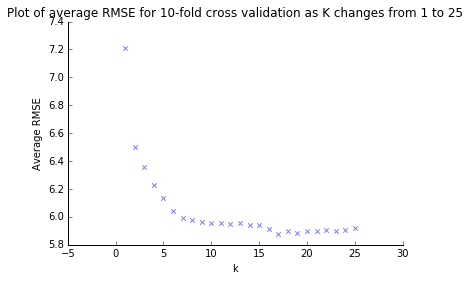

In [20]:
%matplotlib inline

fig = plt.figure()
ax = plt.gca()

plt.title('Plot of average RMSE for 10-fold cross validation as K changes from 1 to 25')
plt.ylabel('Average RMSE')
plt.xlabel('k')

plt.scatter(x=range(1,26),y= avgRMSE,marker='x',color='blue', alpha=0.5, edgecolors='none',
           label='CV average RMSE')


# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles, labels)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(axis='x',which='both',top='off') # labels along the bottom edge are off
plt.tick_params(axis='y',which='both',right='off') # labels along the bottom edge are off

plt.show()


*Enter your observations here*

A reasonable choice of K would be K=3. This is where the RMSE is the lowest and following which it starts to trend upwards.

### Extra-Credit: Forward selection

Thus far the choice of predictor variables has been rather arbitrary. For extra credit, implement a basic [forward selection](http://www.stat.ubc.ca/~rollin/teach/643w04/lec/node41.html) algorithm to progressively include features that decrease the cross-validated RMSE of the model. Note that the optimal value of K may be different for each model, so you may want to use cross-validation to choose K each time (but it is also fine if you fix K at the optimal value from 2.7).  Create a graph that shows RMSE as a function of the number of features in the model. Label each point on the x-axis with the name of the feature that is added at that step in the forward selection algorithm. *(For instance, if the optimal single-feature model has CRIM with RMSE = 10, and the optimal two-feature model has CRIM+ZN with RMSE=9, the first x-axis label will say CRIM and the second x-axis lable with say ZN)*

In [62]:

# enter your code here
import copy
#the various values of L we want to test
l_set = [2]
#the various values of K we want to test #assignment only wants us to test k=1 but it works if you do K_test = [1,2,3,4]
K_test = [25]
#the features we can choose from
totalFeatures = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

def Forward_Optimizer(trainingData,trainingTarget,totalFeatures,folds = 10, L=2,k=[1],debug=0,shuffleData=False,verbose=0):
    Opt_start_time = time.time()
    featurelen = len(totalFeatures)
    Final_List = []
    Temp_List = []
    newFeatureLen = 0
    featureCounter = 0
    minRMSE = 0.0
    k_indicator = []
    RMSE_list = []
    counterTest = 0
    #since there is very little overhead in time (but just in space for each K we want to get, let's just get them all)
    maksK = max(K_test)
    k_index = 0
    

    while len(totalFeatures)>0:
        featureCounter +=1
        counterTest = 0
        newFeatureLen = len(totalFeatures)
        for feature in totalFeatures:
            Final_List.append(feature)                    
            avgRMSE = Cross_Validation(trainingData,trainingTarget,features = Final_List,
                                       folds = folds,L=L,k=k,debug=debug,shuffleData=shuffleData,verbose=verbose)
            k_index = np.argmin(avgRMSE)
            if debug==1:
                print(Final_List)
                print(k_index)
                print(avgRMSE)
            #reset the minRMSE and other counters
            if counterTest ==0:
                minRMSE = avgRMSE[k_index]
                k_indicator.append(k_index+1)
                Temp_List = copy.deepcopy(Final_List)
                RMSE_list.append(avgRMSE[k_index])
            #test for minimum
            if avgRMSE[k_index] < minRMSE:
                minRMSE = avgRMSE[k_index]
                del k_indicator[-1]
                del RMSE_list[-1]
                RMSE_list.append(avgRMSE[k_index])
                k_indicator.append(k_index+1)
                Temp_List = copy.deepcopy(Final_List)
            del Final_List[-1] 
            counterTest += 1
        Final_List = copy.deepcopy(Temp_List)
        #so we don't iterate through an item we've already selected
        totalFeatures.remove(Final_List[-1])
        if verbose==1:
            print("Result for feature: ",featureCounter)
            print(Final_List)
            print(k_indicator)
            print(RMSE_list)
    return Final_List,k_indicator,RMSE_list

                    
            

Final_list, k_indicator,RMSE_list = Forward_Optimizer(trainingData,trainingTarget,totalFeatures = totalFeatures,folds = 10, L=2,k=K_test,debug=0,shuffleData=False,verbose=1)


CV Time taken: 2.036466598510742 seconds
CV Time taken: 2.2115535736083984 seconds
CV Time taken: 2.125530481338501 seconds


c:\program files\python 3.5\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


CV Time taken: 2.183044672012329 seconds
CV Time taken: 2.1865718364715576 seconds
CV Time taken: 2.2555854320526123 seconds
CV Time taken: 2.0534608364105225 seconds
CV Time taken: 2.0644850730895996 seconds
CV Time taken: 1.9704008102416992 seconds
CV Time taken: 1.9373769760131836 seconds
CV Time taken: 2.1715261936187744 seconds
CV Time taken: 1.965388536453247 seconds
CV Time taken: 1.9764246940612793 seconds
Result for feature:  1
['LSTAT']
[25]
[6.0720959987828165]
CV Time taken: 2.0204365253448486 seconds
CV Time taken: 2.005425214767456 seconds
CV Time taken: 1.9913966655731201 seconds
CV Time taken: 2.0144340991973877 seconds
CV Time taken: 2.007444381713867 seconds
CV Time taken: 1.9944007396697998 seconds
CV Time taken: 2.1855533123016357 seconds
CV Time taken: 2.7039175033569336 seconds
CV Time taken: 2.153550148010254 seconds
CV Time taken: 2.2145731449127197 seconds
CV Time taken: 2.247616767883301 seconds
CV Time taken: 2.174546003341675 seconds
Result for feature:  2
[

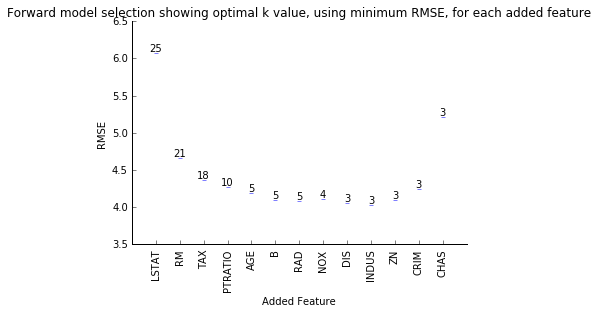

In [104]:
%matplotlib inline

fig = plt.figure()
ax = plt.gca()

plt.title('Forward model selection showing optimal k value, using minimum RMSE, for each added feature')
plt.ylabel('RMSE')
plt.xlabel('Added Feature')

plt.scatter(x=range(1,14),y=RMSE_list,marker='_',color='blue', alpha=0.5, edgecolors='none')


# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles, labels)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(axis='x',which='both',top='off') # labels along the bottom edge are off
plt.tick_params(axis='y',which='both',right='off') # labels along the bottom edge are off

# set the locations and labels of the yticks
plt.xticks(np.arange(1,14),Final_list, rotation=90 )
#add labels to show k values


for label, x, y in zip(k_indicator, range(1,14), RMSE_list):
    plt.annotate(
        str(label),
        xy=(x, y), xytext=(0, 5),
        textcoords='offset points', ha='center', va='center')



plt.show()
